**Big data analitics**

**Assesment project**

Online retails database.
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The aim of this project is to analyze, visualize and study our retail dataset previously mentioned which has been imported from *https://archive.ics.uci.edu/dataset/352/online+retail*.

This dataset was chosen because Machine Learning has had a masive impact in the online retail world. So I wanted my project to be orientated to analyzing a retail dataset in order to analize how Machine Learning can benefit companies to understand patterns among their customers.

**Dataset:** Online Retail
https://archive.ics.uci.edu/dataset/352/online+retail

Features: 8

Instances:541909


Donated: on 2015

Downloaded: 04/10/2023

**Aim**

The aim of the algorithm of my machine learning is two display in a clear way the relevant data to the user and to make  a country prediction 

**Overview**

The Dataset used contains information about online sells from UK-retailers. The aim is to build a productive model to predict what is the nationality of potential customers. In order for companies to know what is their strongest markets.

Peer-reviewed Paper: *https://www.sciencedirect.com/science/article/pii/S0022435920300932#abs0010*

**Data exploration**

**Importing required libraries**

Firstly we will Import our required libraries and import our database in CSV format using pandas. Seaborn and matplotlib.pyplot is used for displaying visually data and we will use  sklearn for applying decision tree. 

In [84]:
# import required variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder

In [85]:
#Import data
df = pd.read_csv('Online Retail.csv')
df.head(10) #or simply df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/2010 08:34,1.69,13047.0,United Kingdom


Now that we can confirm that our database works we will do some exploration on it.

**Size or shape of our dataset:**

In [86]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
originalRow = df.shape[0]


The dataset has 541909 rows and 8 columns


Our dataset has 541909 records or instances and 8 features.

Now we will drop empty values records. if there is any.

In [87]:
df = df.dropna()
print(df.shape[0])
newRow = originalRow  - df.shape[0] 
print(f'The dataset has {df.shape[0]} rows and {newRow} has been dropped')

406829
The dataset has 406829 rows and 135080 has been dropped


Our total usable dataset has 406829 rows and 8 features.

**Understanding the dataset.**

Here we display the Country feature to display for the retailers non-uk sales vs uk sales. 

In [88]:
print(df['Country'].value_counts())

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [89]:
Uksalescount = df.groupby('Country').size()['United Kingdom']
UkporcentSales = (Uksalescount * 100)/df.shape[0]
print(f"UK represnts {UkporcentSales}% with {Uksalescount} sales ")

UK represnts 88.95088599878574% with 361878 sales 


As shown above we can see that UK represets 88.9% of the total sales of the company. Which will make it more challenging at the time of predicting Countries like Saudi Arabia and Bahrain which don't buy a lot.

In [90]:
countries = (df['Country'].unique())
print(countries)

print(f'\n We have {len(countries)} different Countries')

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']

 We have 37 different Countries


As shown before, we have in our dataset 37 different coutries which means 36 countries represent just over the 10% of our data set.

We will use seaborn python library for displaying a graph with a relationship between the amount of sales per country. However since our dataset file has 541909 records, I will use the first  10 000 records instead for the program to run quicker. this sample will be use for training my machine learning algorithm. 

<Axes: xlabel='count', ylabel='Country'>

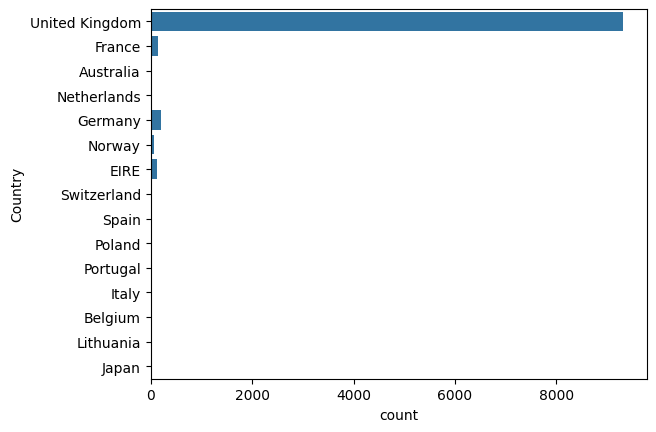

In [91]:
sns.countplot(y='Country', data=df.head(10000))

United Kingdom data creates an imbalance within our dataset. This could become a problem in our algorithm because the accuraccy could be really high but not because of the efficiency of our algorithm. Which means our accuracy is not really reflecting the efficiency of our algorithm.

In order to solve this problem I will proceed to take a random *20%* of the records of purchases made on United Kingdom.

**Inbalance**

Now we will make a month and day subfeature for flexibility purpuses when displaying our graphs in the future.

In [92]:
# Identify rows where 'Country' is 'UK'
uk_rows = df[df['Country'] == 'United Kingdom']

# Calculate the number of rows to drop (80% of UK rows)
rows_to_drop = int(0.80 * len(uk_rows)) #just an interger
print(f" from United Kingdom's records we will delete '{rows_to_drop} records.")

# Get the index values of rows to drop
indexes_to_drop = uk_rows.sample(rows_to_drop).index

# Drop rows by index values
df = df.drop(indexes_to_drop)

# Now 'df' contains the dataset with 80% of the 'UK' rows dropped

 from United Kingdom's records we will delete '289502 records.


*Now we analyze our dataset after balancing it* 

In [93]:
print(f'\n After the balanced, We have {len(countries)} different Countries')

print(df['Country'].value_counts())

Uksalescount = df.groupby('Country').size()['United Kingdom']
UkporcentSales = (Uksalescount * 100)/df.shape[0]
print(f"UK represnts {UkporcentSales}% with {Uksalescount} sales ")


 After the balanced, We have 37 different Countries
United Kingdom          72376
Germany                  9495
France                   8491
EIRE                     7485
Spain                    2533
Netherlands              2371
Belgium                  2069
Switzerland              1877
Portugal                 1480
Australia                1259
Norway                   1086
Italy                     803
Channel Islands           758
Finland                   695
Cyprus                    622
Sweden                    462
Austria                   401
Denmark                   389
Japan                     358
Poland                    341
USA                       291
Israel                    250
Unspecified               244
Singapore                 229
Iceland                   182
Canada                    151
Greece                    146
Malta                     127
United Arab Emirates       68
European Community         61
RSA                        58
Lebanon          

<Axes: xlabel='count', ylabel='Country'>

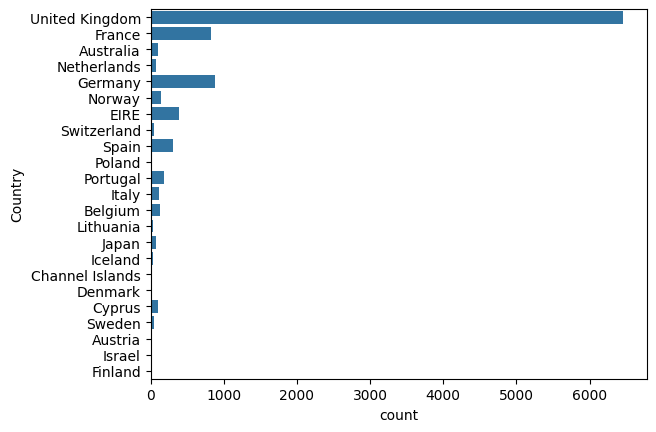

In [94]:
sns.countplot(y='Country', data=df.head(10000)) 

In [95]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month 
df['Day'] = df['InvoiceDate'].dt.day 

df.head(10) #or simply df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,13047.0,United Kingdom,1,12
13,536367,22310,IVORY KNITTED MUG COSY,6,2010-01-12 08:34:00,1.65,13047.0,United Kingdom,1,12
20,536367,48187,DOORMAT NEW ENGLAND,4,2010-01-12 08:34:00,7.95,13047.0,United Kingdom,1,12
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-01-12 08:45:00,3.75,12583.0,France,1,12
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-01-12 08:45:00,3.75,12583.0,France,1,12
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-01-12 08:45:00,3.75,12583.0,France,1,12
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-01-12 08:45:00,0.85,12583.0,France,1,12
30,536370,21883,STARS GIFT TAPE,24,2010-01-12 08:45:00,0.65,12583.0,France,1,12
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-01-12 08:45:00,0.85,12583.0,France,1,12
32,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,2010-01-12 08:45:00,1.25,12583.0,France,1,12


**Preparing data**

We first encode categorical variables.

In [96]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

**Define X and y.**

Here we will define what features we will use in our algorithm and what feature we want our algorithm to predict.

In [97]:
# Define features and target variable
features = [  'Quantity', 'UnitPrice', 'CustomerID', 'Month']
X = df[features]
y = df['Country']

In [98]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Build a Decision tree model**

In [99]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)


# Make predictions on the test data
y_pred = clf.predict(X_test)


**Testing**

In [100]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.998721554589619
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       0.97      1.00      0.99        74
           2       1.00      1.00      1.00         3
           3       1.00      0.99      0.99       430
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        23
           6       0.97      0.99      0.98       157
           7       1.00      0.99      0.99       138
           8       1.00      1.00      1.00         6
           9       0.97      1.00      0.99        77
          10       1.00      1.00      1.00      1552
          11       0.89      1.00      0.94         8
          12       0.99      0.99      0.99       156
          13       1.00      1.00      1.00      1679
          14       1.00      1.00      1.00      1869
          15       1.00      1.00      1.00        27
          16       1.00      1.00      1.00        43

c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gusta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [101]:
# Create a DataFrame to display predicted vs expected countries
results_df = pd.DataFrame({'Expected': label_encoder.inverse_transform(y_test), 'Predicted': label_encoder.inverse_transform(y_pred)})

print(results_df)

                   Expected             Predicted
0               Netherlands           Netherlands
1                   Germany               Germany
2            United Kingdom        United Kingdom
3                   Germany               Germany
4            United Kingdom        United Kingdom
...                     ...                   ...
23461                France                France
23462  United Arab Emirates  United Arab Emirates
23463               Belgium               Belgium
23464        United Kingdom        United Kingdom
23465        United Kingdom        United Kingdom

[23466 rows x 2 columns]


In [102]:
# Filter records where 'Expected' is not equal to 'Predicted'
mismatched_records = results_df[results_df['Expected'] != results_df['Predicted']]

# Display the mismatched records
print(mismatched_records)
mismatched_records.count()


              Expected             Predicted
31            Portugal                 Japan
1008           Finland               Germany
1288            Cyprus               Austria
1305    United Kingdom       Channel Islands
1453           Germany               Finland
2046      Saudi Arabia                France
3358    United Kingdom    European Community
3796    United Kingdom               Denmark
5962    United Kingdom             Lithuania
6607           Germany                France
6742             Spain               Belgium
7222       Netherlands              Portugal
8350    United Kingdom       Channel Islands
8818    United Kingdom               Denmark
9005            Cyprus               Austria
10055   United Kingdom           Unspecified
11867          Belgium                 Spain
11958  Channel Islands        United Kingdom
13946          Germany                France
15176            Spain               Belgium
15772   United Kingdom  United Arab Emirates
17207     

Expected     30
Predicted    30
dtype: int64

Visualize

In [103]:
from sklearn.tree import export_text

# Display the decision tree rules
tree_rules = export_text(clf, feature_names=features)
print(tree_rules)

|--- CustomerID <= 12819.00
|   |--- CustomerID <= 12466.50
|   |   |--- CustomerID <= 12450.50
|   |   |   |--- CustomerID <= 12431.50
|   |   |   |   |--- CustomerID <= 12414.50
|   |   |   |   |   |--- CustomerID <= 12360.50
|   |   |   |   |   |   |--- CustomerID <= 12357.50
|   |   |   |   |   |   |   |--- CustomerID <= 12347.50
|   |   |   |   |   |   |   |   |--- CustomerID <= 12346.50
|   |   |   |   |   |   |   |   |   |--- class: 35
|   |   |   |   |   |   |   |   |--- CustomerID >  12346.50
|   |   |   |   |   |   |   |   |   |--- class: 16
|   |   |   |   |   |   |   |--- CustomerID >  12347.50
|   |   |   |   |   |   |   |   |--- CustomerID <= 12356.50
|   |   |   |   |   |   |   |   |   |--- CustomerID <= 12352.50
|   |   |   |   |   |   |   |   |   |   |--- CustomerID <= 12349.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- CustomerID >  12349.50
|   |   |   |   |   |   |   |   |   |   |   |--- 

This process continues, and at each level, the tree makes a decision based on whether the CustomerID is less than or equal to a specific value. Eventually, the tree reaches a leaf node, where a class label is assigned based on the conditions met during the traversal.

**Reference**

https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/#:~:text=Another%20method%20to%20remove%20rows,value%20we%20want%20to%20remove.